In [6]:
from transformers import pipeline 

modelo = "nvidia/segformer-b1-finetuned-cityscapes-1024-1024"
segmentador = pipeline("image-segmentation", model=modelo)

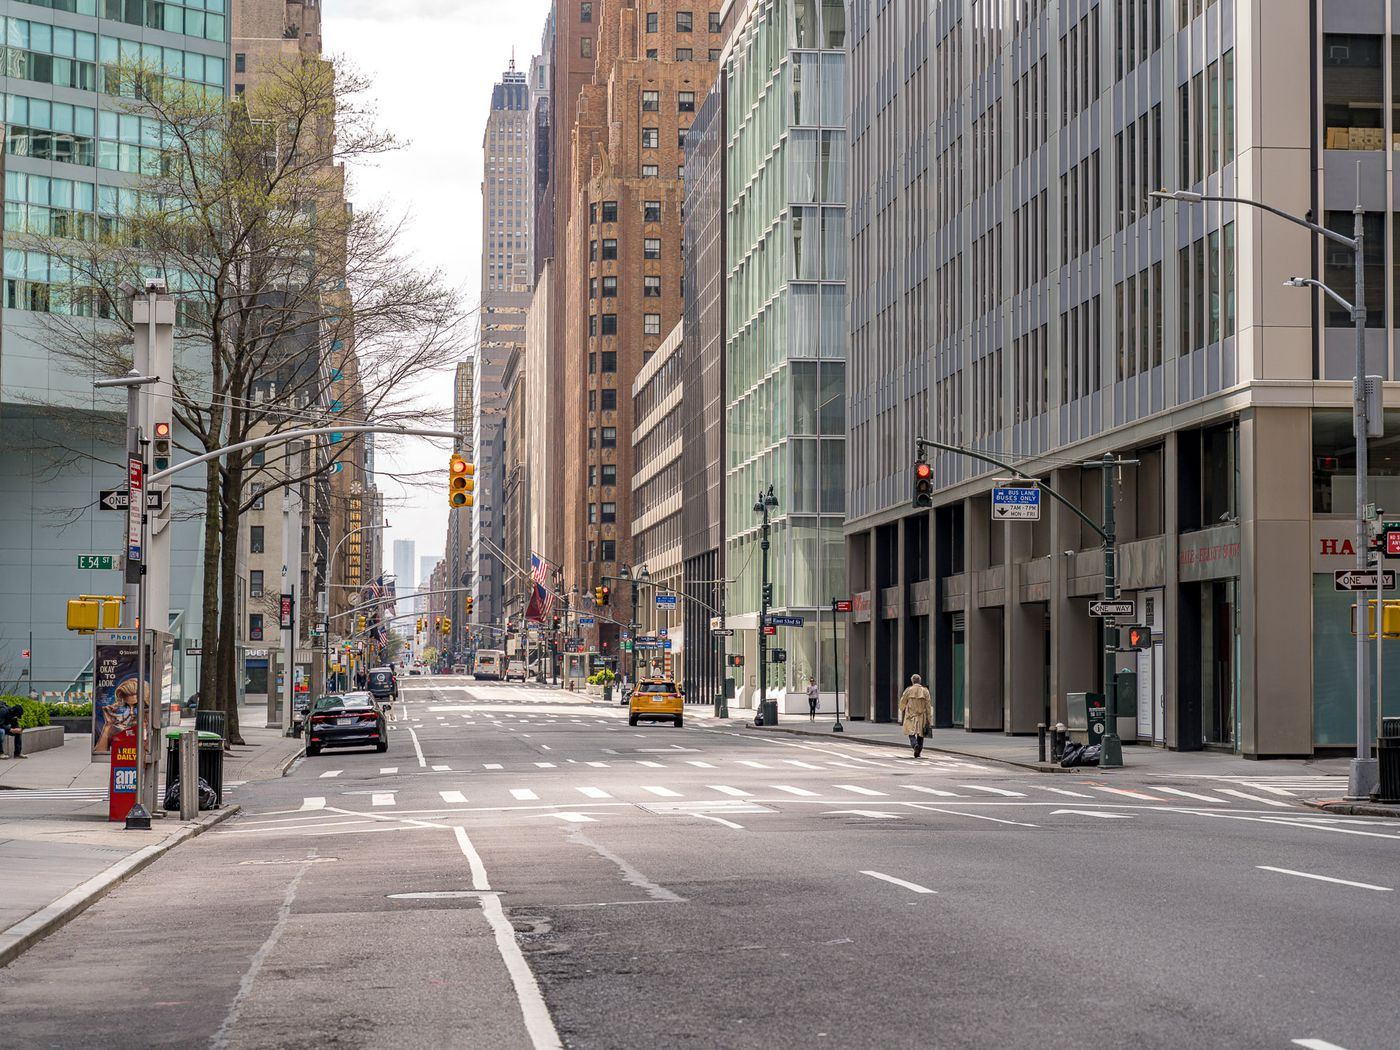

In [4]:
from pathlib import Path 
from PIL import Image 

imagem = Image.open(Path("imagens/cidades/city.jpg"))
imagem

In [7]:
segmentacao = segmentador(imagem)
segmentacao

[{'score': None,
  'label': 'road',
  'mask': <PIL.Image.Image image mode=L size=1400x1050>},
 {'score': None,
  'label': 'sidewalk',
  'mask': <PIL.Image.Image image mode=L size=1400x1050>},
 {'score': None,
  'label': 'building',
  'mask': <PIL.Image.Image image mode=L size=1400x1050>},
 {'score': None,
  'label': 'wall',
  'mask': <PIL.Image.Image image mode=L size=1400x1050>},
 {'score': None,
  'label': 'fence',
  'mask': <PIL.Image.Image image mode=L size=1400x1050>},
 {'score': None,
  'label': 'pole',
  'mask': <PIL.Image.Image image mode=L size=1400x1050>},
 {'score': None,
  'label': 'traffic light',
  'mask': <PIL.Image.Image image mode=L size=1400x1050>},
 {'score': None,
  'label': 'traffic sign',
  'mask': <PIL.Image.Image image mode=L size=1400x1050>},
 {'score': None,
  'label': 'vegetation',
  'mask': <PIL.Image.Image image mode=L size=1400x1050>},
 {'score': None,
  'label': 'terrain',
  'mask': <PIL.Image.Image image mode=L size=1400x1050>},
 {'score': None,
  'label

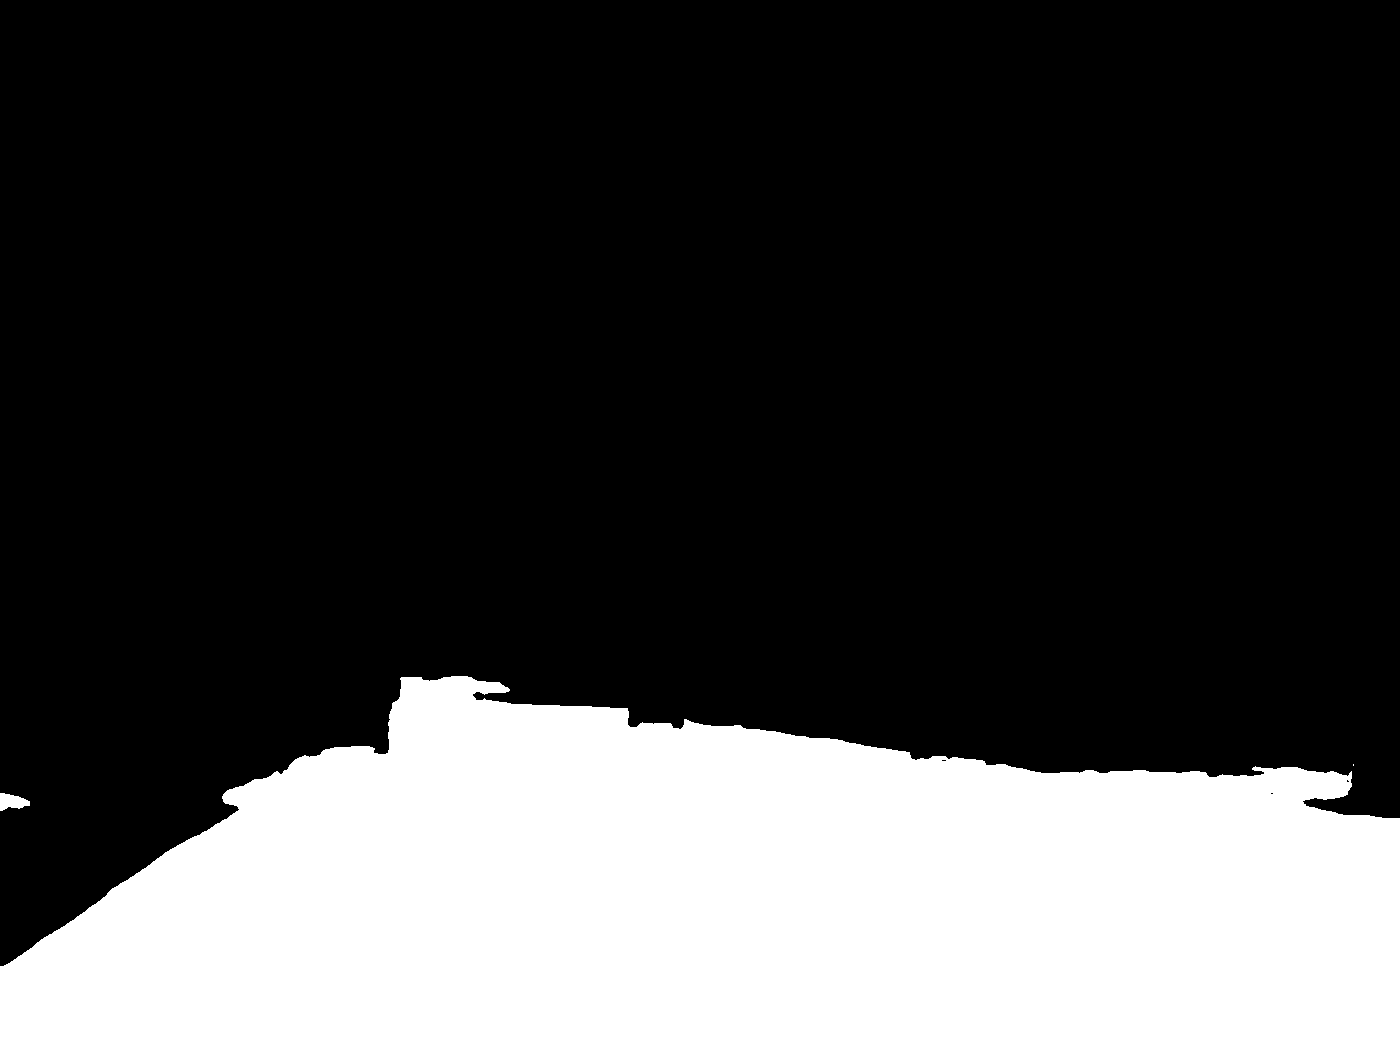

In [10]:
segmentacao_bicicleta = segmentacao[14]

segmentacao_bicicleta['mask']

segmentacao_estrada = segmentacao[0]

segmentacao_estrada['mask']

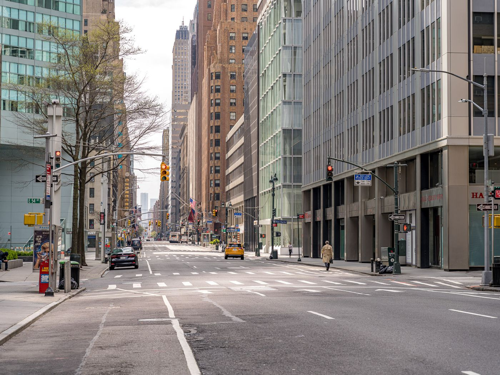

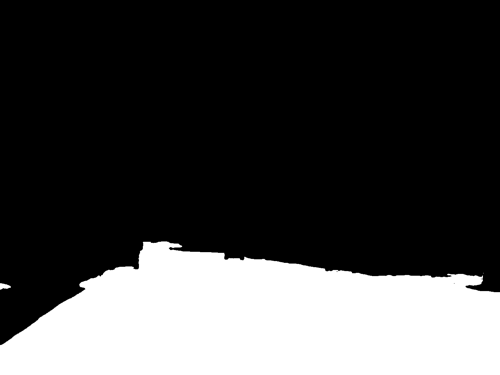

(None, None)

In [14]:
thumb_imagem = imagem.copy()
thumb_imagem.thumbnail((500, 500))
display(thumb_imagem)

thumb_mascara = segmentacao_estrada['mask'].copy()
thumb_mascara.thumbnail((500, 500))
display(thumb_mascara)



In [15]:
import matplotlib.pyplot as plt 
import numpy as np

dados_imagem = np.array(imagem)
dados_mascara = np.array(segmentacao_estrada['mask'])

dados_mascara

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [17]:
print(dados_imagem.shape)
dados_imagem

(1050, 1400, 3)


array([[[150, 165, 168],
        [146, 161, 164],
        [149, 164, 167],
        ...,
        [119, 118, 126],
        [118, 117, 125],
        [117, 116, 124]],

       [[152, 167, 170],
        [148, 163, 166],
        [151, 166, 169],
        ...,
        [119, 118, 126],
        [118, 117, 125],
        [117, 116, 124]],

       [[153, 168, 171],
        [150, 165, 168],
        [153, 168, 171],
        ...,
        [117, 116, 124],
        [117, 116, 124],
        [116, 115, 123]],

       ...,

       [[104, 100, 101],
        [ 96,  92,  93],
        [ 94,  90,  91],
        ...,
        [123, 121, 126],
        [126, 124, 129],
        [137, 135, 140]],

       [[ 98,  94,  95],
        [103,  99, 100],
        [103,  99, 100],
        ...,
        [120, 118, 123],
        [126, 124, 129],
        [134, 132, 137]],

       [[102,  98,  99],
        [106, 102, 103],
        [107, 103, 104],
        ...,
        [120, 118, 123],
        [126, 124, 129],
        [133, 131, 136]]

In [19]:
print(dados_mascara.shape)
dados_mascara

(1050, 1400)


array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [20]:
imagem_mascarada = dados_imagem & dados_mascara[:, :, np.newaxis]
imagem_mascarada

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[104, 100, 101],
        [ 96,  92,  93],
        [ 94,  90,  91],
        ...,
        [123, 121, 126],
        [126, 124, 129],
        [137, 135, 140]],

       [[ 98,  94,  95],
        [103,  99, 100],
        [103,  99, 100],
        ...,
        [120, 118, 123],
        [126, 124, 129],
        [134, 132, 137]],

       [[102,  98,  99],
        [106, 102, 103],
        [107, 103, 104],
        ...,
        [120, 118, 123],
        [126, 124, 129],
        [133, 131, 136]]

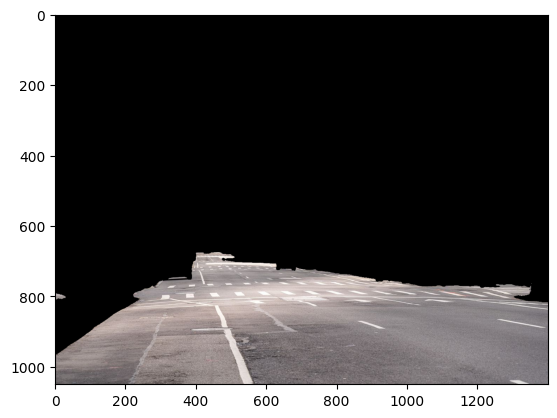

In [21]:
plt.imshow(imagem_mascarada)

In [23]:
mascara_invertida = np.bitwise_not(dados_mascara)
imagem_mascarada = dados_imagem & mascara_invertida[:, :, np.newaxis]
imagem_mascarada.shape, imagem_mascarada

((1050, 1400, 3),
 array([[[150, 165, 168],
         [146, 161, 164],
         [149, 164, 167],
         ...,
         [119, 118, 126],
         [118, 117, 125],
         [117, 116, 124]],
 
        [[152, 167, 170],
         [148, 163, 166],
         [151, 166, 169],
         ...,
         [119, 118, 126],
         [118, 117, 125],
         [117, 116, 124]],
 
        [[153, 168, 171],
         [150, 165, 168],
         [153, 168, 171],
         ...,
         [117, 116, 124],
         [117, 116, 124],
         [116, 115, 123]],
 
        ...,
 
        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],
 
        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],
 
        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [

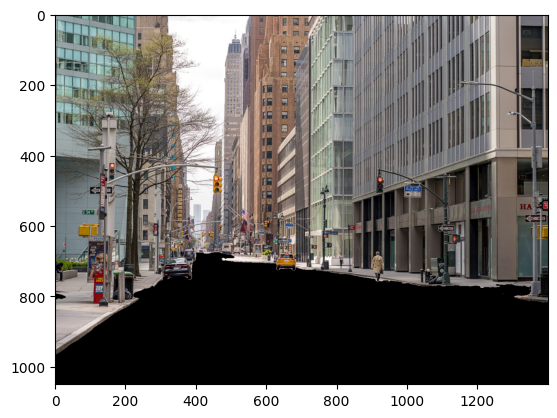

In [25]:
plt.imshow(imagem_mascarada)

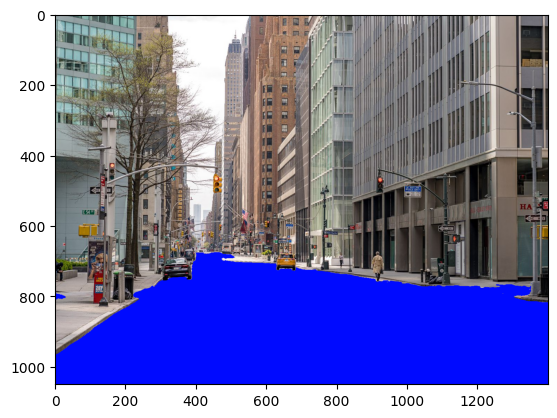

In [34]:
cor = np.array([0,10,255])
imagem_mascara = dados_imagem.copy()
imagem_mascara = np.where(dados_mascara[:, :, np.newaxis] == 255, cor, imagem_mascara).astype(dados_imagem.dtype)

plt.imshow(imagem_mascara)

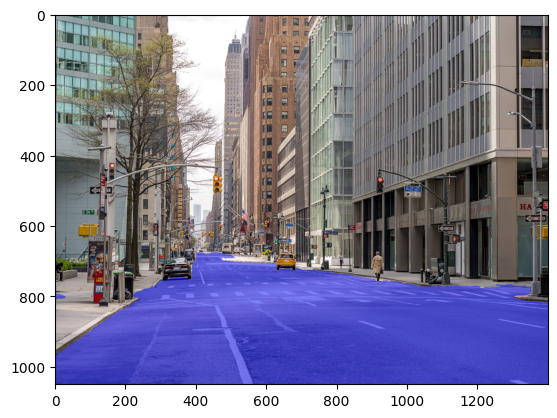

In [36]:
import cv2 

imagem_combinada = cv2.addWeighted(dados_imagem, 0.5, imagem_mascara, 0.5,0)

plt.imshow(imagem_combinada)

In [42]:
def adicionar_mascara(dados_imagem, dados_mascara, cor):
    imagem_mascara = dados_imagem.copy()
    imagem_mascara = np.where(dados_mascara[:, :, np.newaxis] == 255, cor, imagem_mascara).astype(dados_imagem.dtype)
    imagem_combinada = cv2.addWeighted(dados_imagem, 0.5, imagem_mascara, 0.5,0)
    return imagem_combinada

In [37]:
valores = np.linspace(0, 1, len(segmentacao))
valores

array([0.        , 0.07142857, 0.14285714, 0.21428571, 0.28571429,
       0.35714286, 0.42857143, 0.5       , 0.57142857, 0.64285714,
       0.71428571, 0.78571429, 0.85714286, 0.92857143, 1.        ])

In [49]:
from matplotlib import colormaps 

# nome_colormap = 'viridis'
# nome_colormap = 'hot'
nome_colormap = 'hsv'

cmap = colormaps.get_cmap(nome_colormap)

cores = [cmap(x) for x in valores]
cores

[(1.0, 0.0, 0.0, 1.0),
 (1.0, 0.4169121816180639, 0.0, 1.0),
 (1.0, 0.8338243632361279, 0.0, 1.0),
 (0.7492634551458082, 1.0, 0.0, 1.0),
 (0.309189485660074, 1.0, 0.0, 1.0),
 (0.0, 1.0, 0.10772241105651532, 1.0),
 (0.0, 1.0, 0.5246319661417559, 1.0),
 (0.0, 1.0, 0.9647031631761764, 1.0),
 (0.0, 0.6183848775760541, 1.0, 1.0),
 (0.0, 0.201472695957991, 1.0, 1.0),
 (0.2154394856600736, 0.0, 1.0, 1.0),
 (0.6555134551458082, 0.0, 1.0, 1.0),
 (1.0, 0.0, 0.9275743632361277, 1.0),
 (1.0, 0.0, 0.5106621816180639, 1.0),
 (1.0, 0.0, 0.09375, 1.0)]

In [50]:
cores = [(np.array(cor[:3]) * 255).astype(int) for cor in cores]

cores

[array([255,   0,   0]),
 array([255, 106,   0]),
 array([255, 212,   0]),
 array([191, 255,   0]),
 array([ 78, 255,   0]),
 array([  0, 255,  27]),
 array([  0, 255, 133]),
 array([  0, 255, 245]),
 array([  0, 157, 255]),
 array([  0,  51, 255]),
 array([ 54,   0, 255]),
 array([167,   0, 255]),
 array([255,   0, 236]),
 array([255,   0, 130]),
 array([255,   0,  23])]

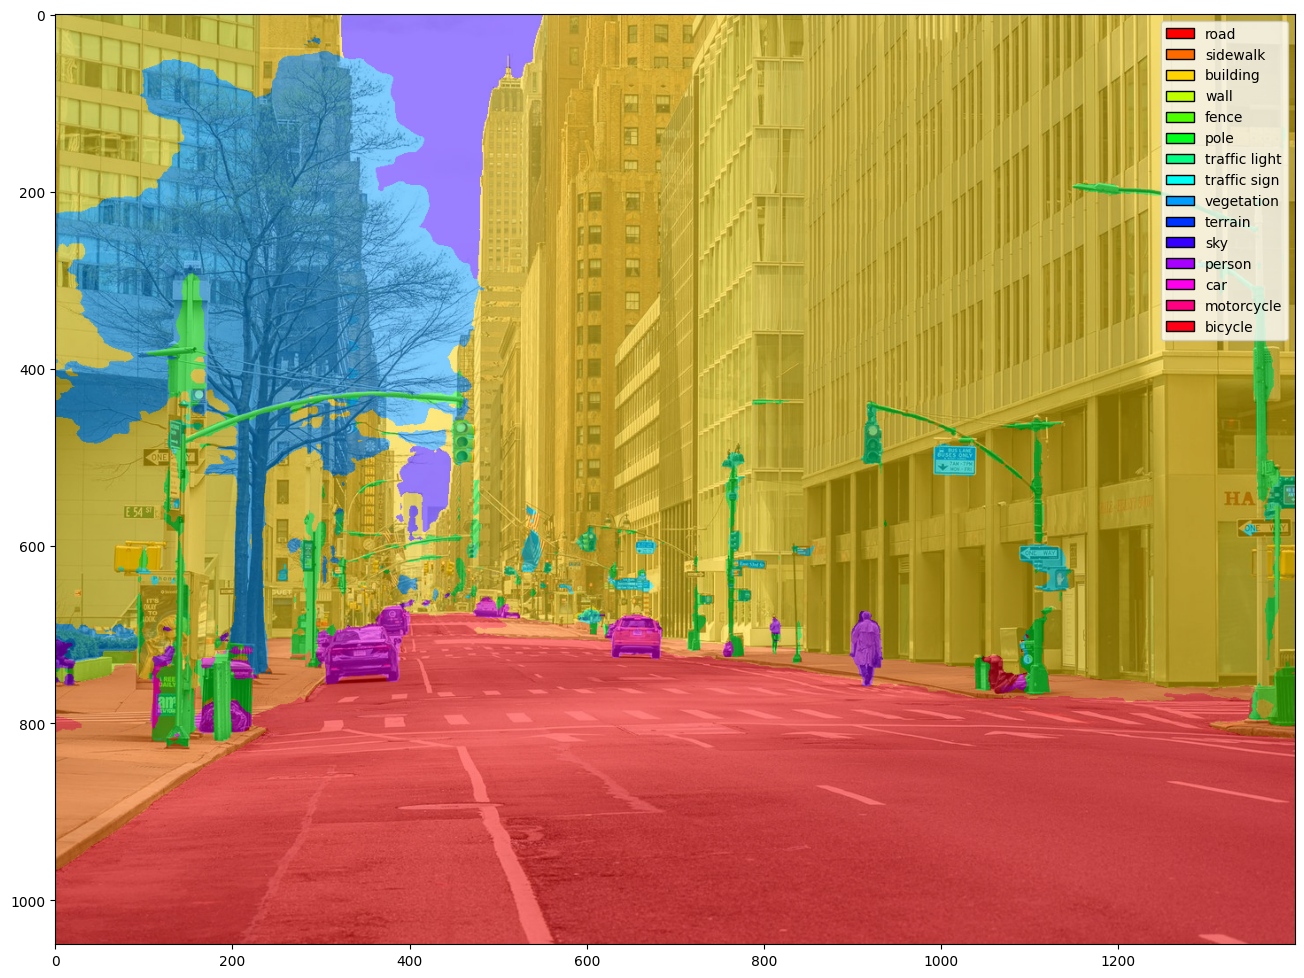

In [51]:
from matplotlib.patches import Patch 

imagem_final = dados_imagem.copy()

legendas = []

for segmento, cor in zip(segmentacao, cores):
    dados_mascara = np.array(segmento["mask"])
    label_mascara = segmento['label']
    imagem_final = adicionar_mascara(imagem_final, dados_mascara, cor)
    legendas.append(Patch(facecolor=cor/255, edgecolor='black', label=label_mascara))
    
fig, ax = plt.subplots(figsize=(16,16))
plt.legend(handles=legendas)
ax.imshow(imagem_final)

In [52]:
modelo = "jonathandinu/face-parsing"
segmentador = pipeline("image-segmentation", model=modelo)

/home/lucas/projects/estudos-python/.venv/lib/python3.10/site-packages/transformers/models/segformer/feature_extraction_segformer.py:28: FutureWarning: The class SegformerFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use SegformerImageProcessor instead.
  warnings.warn(


In [54]:
imagens = [Image.open(arquivo) for arquivo in Path('imagens/pessoas').iterdir()]
for imagem in imagens:
    segmentacao = segmentador(imagem)
    print(segmentacao)
    print('-----')

[{'score': None, 'label': 'background', 'mask': <PIL.Image.Image image mode=L size=1350x1080 at 0x75BBB48BF970>}, {'score': None, 'label': 'skin', 'mask': <PIL.Image.Image image mode=L size=1350x1080 at 0x75BBBC345930>}, {'score': None, 'label': 'nose', 'mask': <PIL.Image.Image image mode=L size=1350x1080 at 0x75BBBC37ED70>}, {'score': None, 'label': 'eye_g', 'mask': <PIL.Image.Image image mode=L size=1350x1080 at 0x75BBC993CD90>}, {'score': None, 'label': 'l_eye', 'mask': <PIL.Image.Image image mode=L size=1350x1080 at 0x75BBB48D2FB0>}, {'score': None, 'label': 'r_eye', 'mask': <PIL.Image.Image image mode=L size=1350x1080 at 0x75BBB48D2F80>}, {'score': None, 'label': 'l_brow', 'mask': <PIL.Image.Image image mode=L size=1350x1080 at 0x75BBB48D2F50>}, {'score': None, 'label': 'u_lip', 'mask': <PIL.Image.Image image mode=L size=1350x1080 at 0x75BBB48D2C80>}, {'score': None, 'label': 'l_lip', 'mask': <PIL.Image.Image image mode=L size=1350x1080 at 0x75BBB48D3130>}, {'score': None, 'label'

In [56]:
def plotar_segmentos(imagem, segmentacao, nome_colormap):
    # Pegar cores de output
    cmap = colormaps.get_cmap(nome_colormap)
    cores = [
        (np.array(cmap(x)[:3]) * 255).astype(int) 
        for x in np.linspace(0, 1, len(segmentacao))
    ]
    
    # Apresentar output em imagem de saída
    imagem_final = np.array(imagem).copy()
    legendas = []
    for segmento, cor in zip(segmentacao, cores):
        dados_mascara = np.array(segmento['mask'])
        label_mascara = segmento['label']
        imagem_final = adicionar_mascara(imagem_final, dados_mascara, cor)
        legendas.append(Patch(facecolor=cor/255, edgecolor='black', label=label_mascara))
    
    fig, ax = plt.subplots(figsize=(16, 16))
    plt.legend(handles=legendas)
    
    ax.imshow(imagem_final)

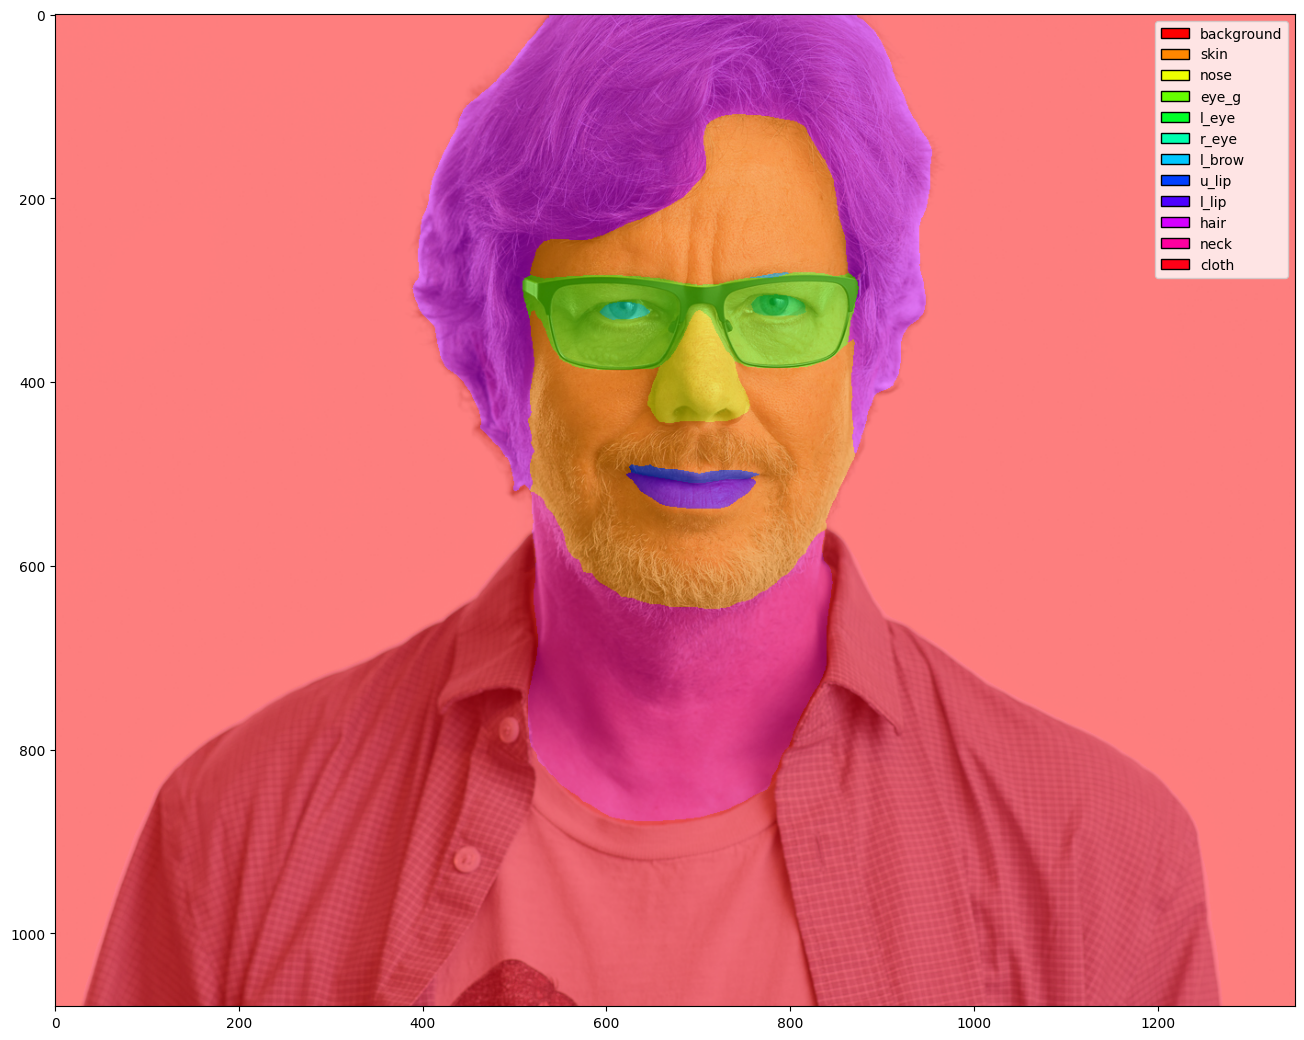

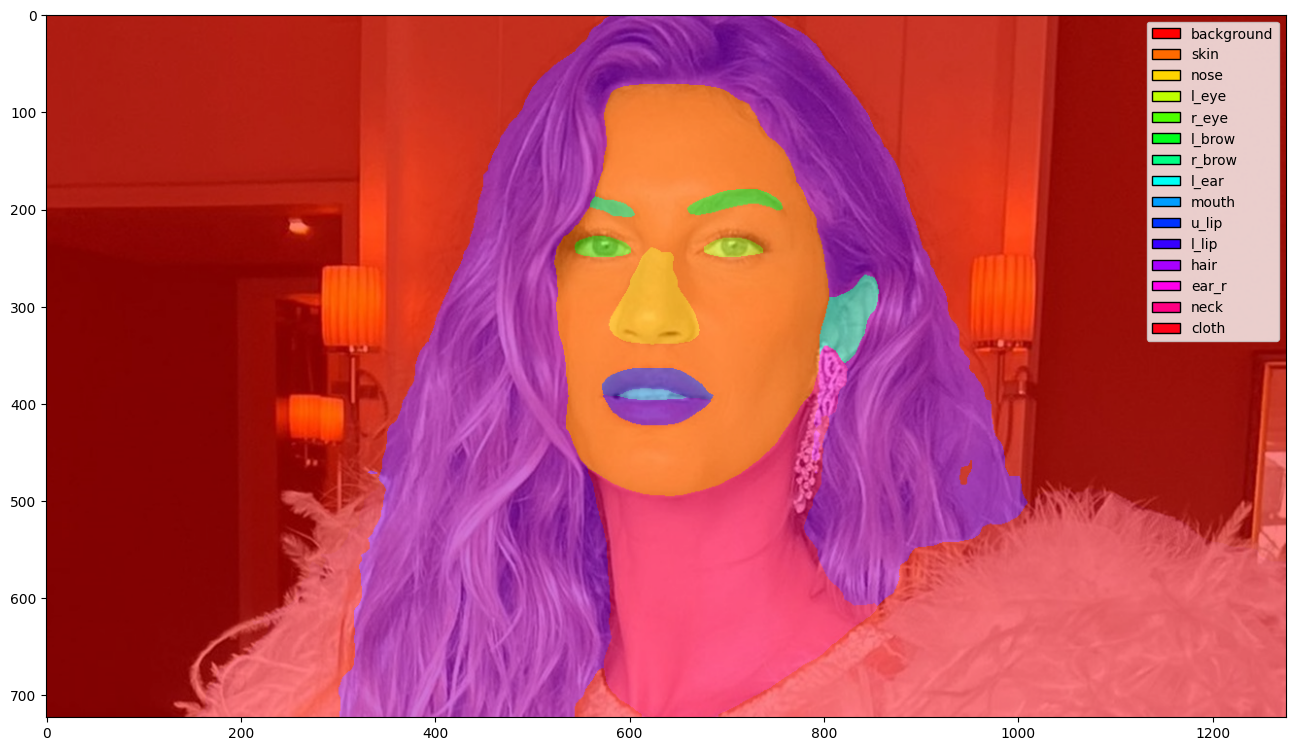

In [57]:
for imagem in imagens:    
    segmentacao = segmentador(imagem)
    plotar_segmentos(imagem=imagem, segmentacao=segmentacao, nome_colormap=nome_colormap)
    plt.show()